# Analysis of IMDB Data

Analyzing a subset of IMDB's actors, genres, movie actors, and movie ratings data sourced from Kaggle via a public s3 bucket. (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> Name Basics
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> Title Basics
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> Title Principles
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> Title Ratings

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries 

In [1]:
%%info

Installing the necessary packages

In [2]:
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1701881141930_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, importing the installed packages from the previous block

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Loading all data from S3 into a Spark dataframe object 

In [4]:
name = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
titles = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
principals = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

Displaying the schema:

In [5]:
name.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Displaying the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [6]:
name.select('primaryName', 'birthYear', 'deathYear', 'knownForTitles').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Title Basics

Displaying the first 15 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [7]:
titles.select('titleType', 'primaryTitle', 'genres').show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
|    short|Akrobatisches Pot...|   Documentary,Short|
|    short|The Arrival of a ...|Action,Documentar...|
|    short|The Photographica...|   Documentary,Short|
|    short|The Sprinkler Spr...|        Comedy,Short|
|    short| Autour d'une cabine|     Animation,Short|
+---------+-----------------

Displaying the unique titles:

In [8]:
unique_title = titles.select('titleType').distinct()
unique_title.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Displaying the schema:

In [9]:
titles.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principles

Displaying the schema:

In [10]:
principals.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Displaying the first 15 rows where the "category" column is "self"

In [11]:
principals.filter(principals["category"] == "self").show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+
|tt0000001|       1|nm1588970|    self| \N|         ["Herself"]|
|tt0000012|       1|nm2880396|    self| \N|         ["Herself"]|
|tt0000012|       2|nm9735580|    self| \N|         ["Himself"]|
|tt0000012|       3|nm0525900|    self| \N|         ["Herself"]|
|tt0000012|       4|nm9735581|    self| \N|         ["Herself"]|
|tt0000012|       7|nm9735579|    self| \N|         ["Herself"]|
|tt0000012|       8|nm9653419|    self| \N|         ["Herself"]|
|tt0000013|       1|nm0525908|    self| \N|         ["Himself"]|
|tt0000013|       2|nm1715062|    self| \N|         ["Himself"]|
|tt0000016|       1|nm0525900|    self| \N|["Herself (on the...|
|tt0000016|       2|nm9735581|    self| \N|["Herself (on the...|
|tt0000024|       1|nm0256651|    self| \N|["Herself - Empre...|
|tt0000024|       2|nm043

## Title Ratings

Displaying the schema:

In [12]:
ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Displaying the first 10 rows in a descending order by the number of votes

In [13]:
from pyspark.sql.functions import col
ratings.withColumn("numVotes", col("numVotes").cast("float"))\
    .sort(col("numVotes").desc())\
    .show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+---------+
|   tconst|averageRating| numVotes|
+---------+-------------+---------+
|tt0111161|          9.3|2159745.0|
|tt0468569|          9.0|2134602.0|
|tt1375666|          8.8|1892958.0|
|tt0137523|          8.8|1725444.0|
|tt0110912|          8.9|1695159.0|
|tt0109830|          8.8|1662609.0|
|tt0944947|          9.4|1606096.0|
|tt0133093|          8.7|1554345.0|
|tt0120737|          8.8|1548920.0|
|tt0167260|          8.9|1533632.0|
+---------+-------------+---------+
only showing top 10 rows

# Overview of Data

Displaying the number of rows and columns in each dataFrame object.

In [14]:
name_cols = len(name.columns)
name_rows = name.count()

titles_cols = len(titles.columns)
titles_rows = titles.count()

principals_cols = len(principals.columns)
principals_rows = principals.count()

ratings_cols = len(ratings.columns)
ratings_rows = ratings.count()

print(f"Number of columns in Name Basics table: {name_cols}")
print(f"Number of rows in Name Basics table: {name_rows}\n")

print(f"Number of columns in Title Basics table: {titles_cols}")
print(f"Number of rows in Title Basics table: {titles_rows}\n")

print(f"Number of columns in Title Principals table: {principals_cols}")
print(f"Number of rows in Title Principals table: {principals_rows}\n")

print(f"Number of columns in Title Ratings table: {ratings_cols}")
print(f"Number of rows in Title Ratings table: {ratings_rows}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table: 6
Number of rows in Name Basics table: 9706922

Number of columns in Title Basics table: 9
Number of rows in Title Basics table: 6321302

Number of columns in Title Principals table: 6
Number of rows in Title Principals table: 36468817

Number of columns in Title Ratings table: 3
Number of rows in Title Ratings table: 993153

# PART 2 - Analyzing Genres

To determine the number of unique genres represented in this dataset, I'll examine the genres per movie, which are listed as a list. This setup allows for a quick overview of the genres each movie falls under, but it poses challenges when trying to answer questions such as: 

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

To "break out" the genres from the tconst, we can create an association table by mapping each tconst multiple times to each distinct genre. 

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |


The desired outcome is to derive a table like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


This table facilitates various analyses, such as rollups, to answer questions asked above.

Implementing the code necessary to derive the table described from the dataset

In [15]:
titles.select("tconst", "titleType", "genres").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Displaying the first 10 rows of the association table:

In [16]:
from pyspark.sql.functions import split, explode
association_table = titles.select("tconst", "titleType", explode(split(titles["genres"], ",")) \
                                .alias("genres"))
association_table.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|     genres|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie title type?**

In [17]:
movies = titles.filter(col("titleType") == "movie")
unique_genres = movies.select(explode(split(col("genres"), ",")) \
                                .alias("genres")).distinct()
total_unique_genres = unique_genres.count()
total_unique_genres

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [18]:
unique_genres.show(unique_genres.count(), truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genres     |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

**Remove "\N" from above table**

In [19]:
unique_genres = movies.select(explode(split(col("genres"), ",")) \
                                .alias("genres")) \
                        .filter(col("genres") != "\\N") \
                        .distinct()

unique_genres.show(unique_genres.count(), truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genres     |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

## Top Genres by Movies

Finding the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

Now, unroll the distinct count and display the average rating value per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |


First, joining the two dataframes (movie ratings and genres) by tconst.

In [20]:
joined_df = ratings.join(titles, on='tconst')

nll = '\\N'

avgRating_genres = joined_df.withColumn('genre', explode(split('genres', ','))) \
    .filter(col('titleType') == 'movie') \
    .filter(col('genre') != nll) \
    .select('genre', col('averageRating').cast('float'))

avgRating_genres.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, aggregating along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [21]:
from pyspark.sql.functions import round, avg
joined_df = ratings.join(movies, ['tconst'], 'inner')
nll = '\\N'
new_avgRating_genres = avgRating_genres.groupBy('genre').agg(round(avg('averageRating'),15).alias('avg_rating'))
new_avgRating_genres.show(20, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Mystery    |5.940437537126316|
|Musical    |6.203246053185319|
|Action     |5.718734067904495|
|Sport      |6.600145190943391|
|Romance    |6.125714179294426|
|Thriller   |5.625967567519544|
|Family     |6.250560452699635|
|Fantasy    |5.924820762891499|
|History    |6.822718117193864|
|Animation  |6.326203749467441|
|Film-Noir  |6.636246780503378|
|Sci-Fi     |5.325150006900168|
|News       |7.200916040944689|
|Drama      |6.288080211097538|
|Documentary|7.245469805371099|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
|Crime      |6.026013333109149|
|War        |6.483807036278403|
|Adult      |5.721742579082059|
+-----------+-----------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, building a bar chart of all genres by utilizing the matplotlib magic with %matplot plt.


In [22]:
new_avgRating_genres_desc = new_avgRating_genres.orderBy('avg_rating', ascending=False).show(20, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Short      |7.259999942779541|
|Documentary|7.245469805371099|
|News       |7.200916040944689|
|Biography  |6.983637643044585|
|Game-Show  |6.974999904632568|
|History    |6.822718117193864|
|Music      |6.752020207214588|
|Film-Noir  |6.636246780503378|
|Sport      |6.600145190943391|
|War        |6.483807036278403|
|Reality-TV |6.379310377712907|
|Animation  |6.326203749467441|
|Drama      |6.288080211097538|
|Family     |6.250560452699635|
|Musical    |6.203246053185319|
|Romance    |6.125714179294426|
|Crime      |6.026013333109149|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
|Mystery    |5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

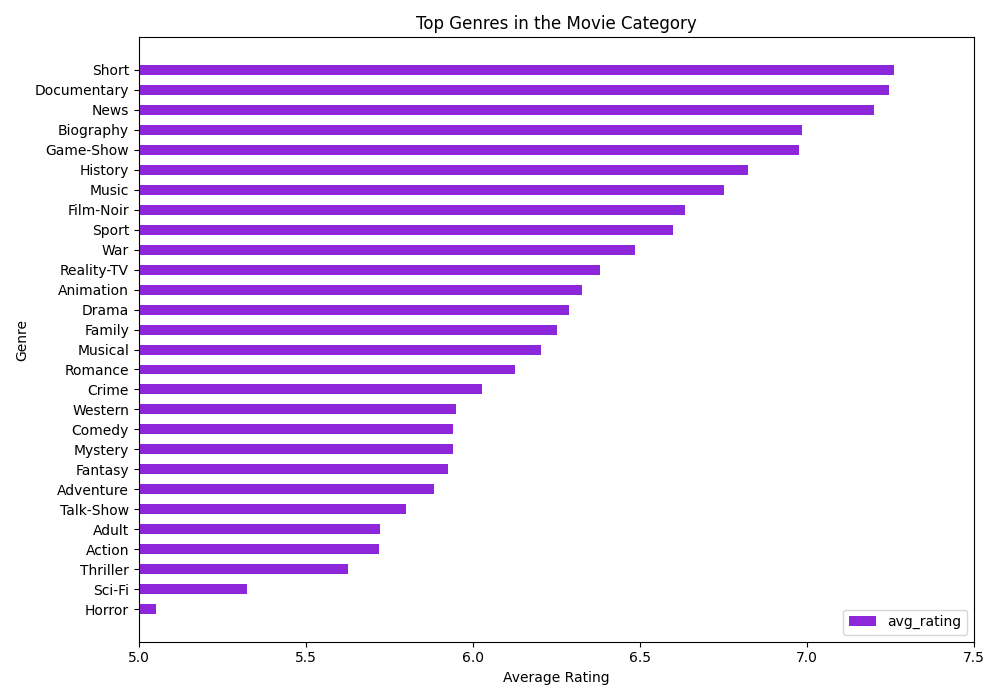

In [23]:
import numpy as np

new_avgRating_genres_ascend = new_avgRating_genres.orderBy('avg_rating')
genre_names = new_avgRating_genres_ascend.select('genre').rdd.flatMap(lambda x: x).collect()
avg_ratings = new_avgRating_genres_ascend.select('avg_rating').rdd.flatMap(lambda x: x).collect()


plt.figure(figsize=(10, 7))  
plt.barh(genre_names, avg_ratings, color='#8e27d9', height=0.5)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top Genres in the Movie Category')


plt.xlim(5.0, 7.5)
plt.xticks([5.0, 5.5, 6.0, 6.5, 7.0, 7.5])

plt.tight_layout()

plt.legend(['avg_rating'])

%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [24]:
principals.select("tconst", "category").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [25]:
principals.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [26]:
principals.select("category").distinct().show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

Now finding the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |


In [27]:
category_counts = principals.groupBy("category").count()

category_counts.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actress            |6325097|
|producer           |2197866|
|production_designer|285924 |
|writer             |4811596|
|actor              |8493701|
|cinematographer    |1300404|
|archive_sound      |2143   |
|archive_footage    |209035 |
|self               |6153089|
|editor             |1197669|
|composer           |1313187|
|director           |4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, constructing a bar chart of the top 5 categories by utilizing the matplotlib magic with %matplot plt.

In [28]:
category_counts = principals.groupBy("category").count().orderBy("count", ascending=False)
category_counts.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actor              |8493701|
|actress            |6325097|
|self               |6153089|
|writer             |4811596|
|director           |4179106|
|producer           |2197866|
|composer           |1313187|
|cinematographer    |1300404|
|editor             |1197669|
|production_designer|285924 |
|archive_footage    |209035 |
|archive_sound      |2143   |
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

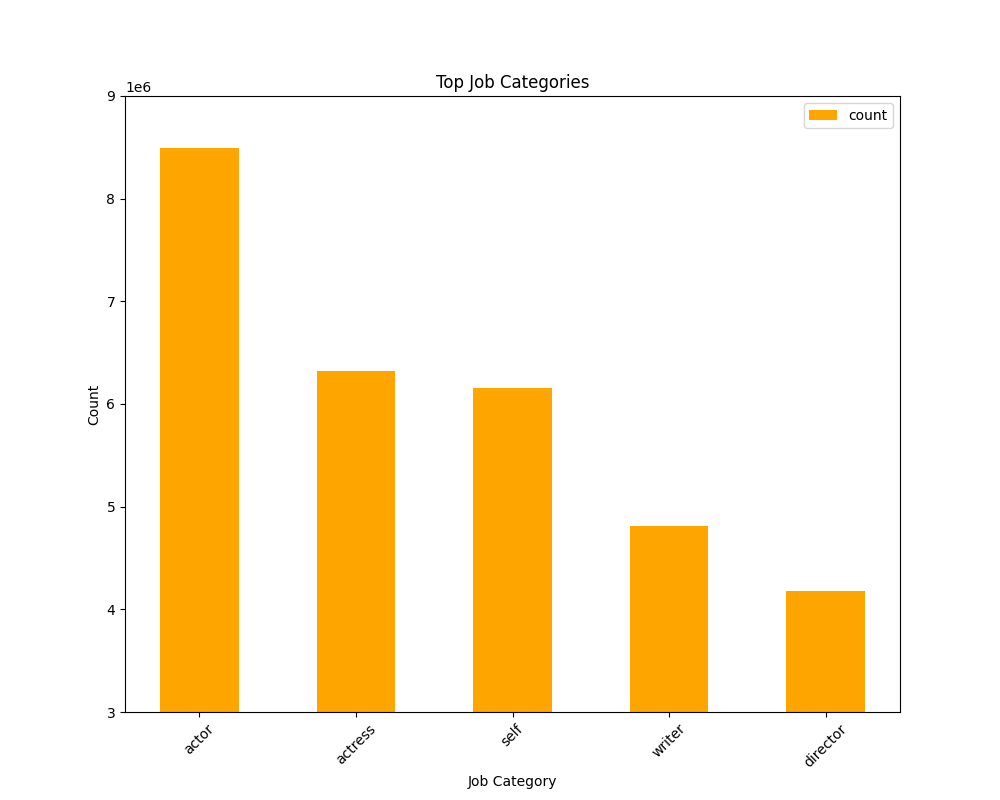

In [29]:
top_5_categories = category_counts.orderBy("count", ascending=False).limit(5).toPandas()

plt.figure(figsize=(10, 8))
plt.bar(top_5_categories['category'], top_5_categories['count'], color='orange', width=0.5)
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.title('Top Job Categories')
plt.xticks(rotation=45)
plt.ylim([3000000, 9000000])
plt.legend(['count'])

%matplot plt


# PART 4 - Answer to the following questions:

## 1) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

In [30]:
depp_movies = principals.alias("p") \
    .join(name.alias("n"), (col("p.nconst") == col("n.nconst"))) \
    .filter((col("n.primaryName") == "Johnny Depp") & (col("p.category") == "actor")) \
    .select("p.tconst")

carter_movies = principals.alias("p") \
    .join(name.alias("n"), (col("p.nconst") == col("n.nconst"))) \
    .filter((col("n.primaryName") == "Helena Bonham Carter") & (col("p.category") == "actress")) \
    .select("p.tconst")

together_movies = depp_movies.join(carter_movies, "tconst", "inner") \
    .join(titles, "tconst", "inner") \
    .select("primaryTitle")

together_movies.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
+----------------------------------------------+

## 2) What are the movies in which Brad Pitt has acted since 2010?

In [31]:
join_pt = principals.join(titles, "tconst", "inner")

pitt_movies = join_pt.alias("p") \
    .join(name.alias("n"), (col("p.nconst") == col("n.nconst"))) \
    .filter((col("n.primaryName") == "Brad Pitt") & (col("p.category") == "actor") & (col("p.startYear") > 2010) & (col("titleType") == "movie")) \
    .select("p.primaryTitle", "p.startYear")

pitt_movies.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|By the Sea                       |2015     |
|Babylon                          |2021     |
|The Big Short                    |2015     |
|12 Years a Slave                 |2013     |
|The Tree of Life                 |2011     |
|Fury                             |2014     |
|Moneyball                        |2011     |
|Killing Them Softly              |2012     |
|Allied                           |2016     |
|War Machine                      |2017     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|World War Z                      |2013     |
+---------------------------------+---------+

## 3) How many movies has Zendaya acted in each year?

In [32]:
from pyspark.sql.functions import count

join_pt = principals.join(titles, "tconst", "inner")

zendaya_movies = join_pt.alias("p") \
    .join(name.alias("n"), col("p.nconst") == col("n.nconst")) \
    .filter((col("n.primaryName") == "Zendaya") & (col("p.category") == "actress") & (col("titleType") == "movie") & (col("p.startYear") != "\\N"))

counted_movies = zendaya_movies.groupBy("startYear").agg(count("*").alias("count"))

counted_movies.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2020     |1    |
|2018     |2    |
|2017     |1    |
+---------+-----+

## 4) Which movies, released in 2019, have an average rating exceeding 9.7?

In [33]:
join_titleRating = titles.join(ratings, 'tconst')

high_rated_movies = join_titleRating.filter((col("titleType") == "movie") &
                                                    (col("startYear") == "2019") &
                                                    (col("averageRating").cast("float") > 9.7)) \
    .select("primaryTitle", col("averageRating").alias("averageRating").cast("float")) \
    .orderBy(col("averageRating").desc())

high_rated_movies.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|A Grunt's Life                                   |10.0         |
|Kirket                                           |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|Love in Kilnerry                                 |10.0         |
|Superhombre                                      |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|The Cardinal                                     |9.9          |
|Square On

## 5) Among the titles in which Clint Eastwood and Harrison Ford have acted, who has the higher average rating?



In [34]:
eastwood_movies = principals.join(name, principals.nconst == name.nconst) \
    .join(ratings, principals.tconst == ratings.tconst) \
    .filter((col("primaryName") == "Clint Eastwood") & (col("category") == "actor"))

ford_movies = principals.join(name, principals.nconst == name.nconst) \
    .join(ratings, principals.tconst == ratings.tconst) \
    .filter((col("primaryName") == "Harrison Ford") & (col("category") == "actor"))

avg_eastwood = eastwood_movies.agg({"averageRating": "avg"}).collect()[0][0]
avg_ford = ford_movies.agg({"averageRating": "avg"}).collect()[0][0]

print(f"The average rating of Harrison Ford is {avg_ford:.2f}")
print(f"The average rating of Clint Eastwood is {avg_eastwood:.2f}")

if avg_eastwood > avg_ford:
    print("Clint Eastwood has a higher average rating")
else:
    print("Harrison Ford has a higher average rating")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The average rating of Harrison Ford is 6.75
The average rating of Clint Eastwood is 7.71
Clint Eastwood has a higher average rating

## 6) What is the movie(s) with the highest average rating among those in which Chris Evans has acted?

Writing the code in a way that it finds and displays all movies with the highest rating, even if there's more than one. 

In [35]:
result = (
    name.filter(col("primaryName") == "Chris Evans")
    .join(principals, name.nconst == principals.nconst)
    .join(titles.filter(col("titleType") == "movie"), "tconst")
    .join(ratings, "tconst")
    .select("primaryTitle", "averageRating")
)

max_rating = result.agg({"averageRating": "max"}).collect()[0][0]

result.filter(result.averageRating == max_rating).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+-------------+
|primaryTitle          |averageRating|
+----------------------+-------------+
|Avengers: Infinity War|8.5          |
|Avengers: Endgame     |8.5          |
+----------------------+-------------+

## 7) What is the percentage of adult titles in which actors and actresses have acted?

In [36]:
merged_data = principals.join(name, principals.nconst == name.nconst, "inner") \
    .join(titles, principals.tconst == titles.tconst, "inner") \
    .join(ratings, titles.tconst == ratings.tconst, "inner")

actors_subset = merged_data.filter(col("category").isin(["actor"]))
actresses_subset = merged_data.filter(col("category").isin(["actress"]))

actors_count = actors_subset.count()
actresses_count = actresses_subset.count()

adult_actors = actors_subset.filter(col("isAdult") == 1).count()
adult_actresses = actresses_subset.filter(col("isAdult") == 1).count()

percentage_actors = (adult_actors / actors_count) * 100
percentage_actresses = (adult_actresses / actresses_count) * 100

print(f"The percentage of adult titles actors have acted is: {percentage_actors:.2f}%")
print(f"The percentage of adult titles actresses have acted is: {percentage_actresses:.2f}%")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The percentage of adult titles actors have acted is: 2.14%
The percentage of adult titles actresses have acted is: 5.33%

## 8) What are the top 10 movie genres with the shortest average runtime?



In [37]:
movies_data = titles.withColumn("runtimeMinutes", titles["runtimeMinutes"].cast("float")) \
    .filter(col("titleType") == "movie")

separated_genres = movies_data.withColumn("genre", explode(split(col("genres"), ", "))) \
    .withColumn("genre", explode(split(col("genre"), ",")))

avg_runtime = separated_genres.groupBy("genre").avg("runtimeMinutes") \
    .withColumn("avg(runtimeMinutes)", round("avg(runtimeMinutes)", 2)) \
    .filter(col("genre") != "\\N") \
    .orderBy("avg(runtimeMinutes)") \
    .show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------------+
|      genre|avg(runtimeMinutes)|
+-----------+-------------------+
|      Short|              18.67|
|       News|              66.85|
|Documentary|              72.68|
| Reality-TV|              76.28|
|      Adult|              77.18|
|    Western|              79.36|
|  Talk-Show|              79.43|
|  Animation|              80.75|
|  Biography|              81.05|
|  Film-Noir|              83.76|
+-----------+-------------------+
only showing top 10 rows

## 9) What are the most common character names for actors and actresses in Romance movies?

In [38]:
from pyspark.sql.functions import max

romance_movies = titles.filter((col("titleType") == "movie") & col("genres").contains("Romance"))

romance_join = romance_movies.join(principals, "tconst")

actors_actresses = romance_join.filter((col("category").isin(["actor", "actress"])) & (col("characters") != "\\N")) \
    .groupBy("category", "characters") \
    .agg(count("*").alias("count"))

common_characters = actors_actresses.join(
    actors_actresses.groupBy("category").agg(max("count").alias("max_count")), "category"
).filter(col("count") == col("max_count")).select("category", "count", col("characters").alias("characters"))

common_characters.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----+----------+
|category|count|characters|
+--------+-----+----------+
| actress|  228|  ["Anna"]|
|   actor|  182| ["David"]|
+--------+-----+----------+